In [45]:
from src import TARS, markets, portfolios, traders, strategies
import pandas as pd
%matplotlib inline

# Offline Testing

Welcome on the offline testing environment from Tars. It uses the same API than the online environment, but with virtual money. It's the best place to test your strategies before going online!


## Instanciate Tars

In [46]:
root = '../'
api_key = f'{root}kraken.key'

In [47]:
# Create Tars and its associated objects
tars = TARS()

portfolio_1 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_1 = traders.VirtualCryptoTrader(portfolio_1)

portfolio_2 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_2 = traders.VirtualCryptoTrader(portfolio_2)

portfolio_3 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_3 = traders.VirtualCryptoTrader(portfolio_3)

In [48]:
# Load strategies
strategy_1 = strategies.BuyAndHold(trader_1, 'XETHZUSD', 0.2)
strategy_2 = strategies.TrendFollowingMACD(trader_2, 'XETHZUSD', 0.2)
strategy_3 = strategies.RandomInvestment(trader_3, 'XETHZUSD', 0.2)

tars.load(strategy_1)
tars.load(strategy_2)
tars.load(strategy_3)

## Start the bot

In [49]:
# Start the bot with a loop frequency ten second
tars.start('00:00:10')
tars.is_running

True

## Evaluate the strategy

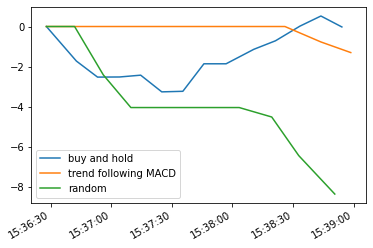

ERROR:root:The base XETH isn't available in the portfolio.


In [75]:
#col = 'value'
col = 'total net profit'
#col = 'profit factor'
#col = 'average trade net profit'

s1 = strategy_1.evaluator.evaluate()[col]
s1.name = 'buy and hold'

s2 = strategy_2.evaluator.evaluate()[col]
s2.name = 'trend following MACD'

s3 = strategy_3.evaluator.evaluate()[col]
s3.name = 'random'

s1.plot(legend=True)
s2.plot(legend=True)
s3.plot(legend=True);

In [36]:
strategy_2.evaluator.evaluate()

,value,total net profit,profit factor,average trade net profit
2021-08-10 15:22:46.714391+00:00,1000,0,1.0,0.0
2021-08-10 15:23:02.107088+00:00,1000,0,1.0,0.0
2021-08-10 15:23:18.713550+00:00,1000,0,1.0,0.0
2021-08-10 15:23:34.973466+00:00,1000,0,1.0,0.0
2021-08-10 15:23:49.024938+00:00,1000,0,1.0,0.0
2021-08-10 15:24:04.473249+00:00,1000,0,1.0,0.0


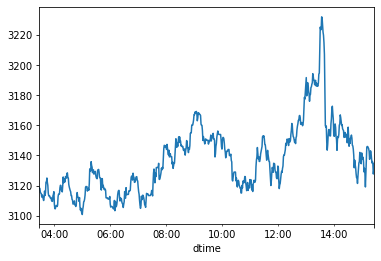

In [34]:
markets.CryptoMarket().get_ohlc_data(pair='XETHZUSD')[0]['close'].plot();

## Stop the bot

In [44]:
tars.stop()
tars.is_running

False

---